# Initiation

Before running install `husl` library  by typing

``` 
pip install husl
```

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Code for fourier transform

In [22]:
from husl import husl_to_rgb, huslp_to_rgb

from scipy.interpolate import interp2d

def vectorize_husl(f):
    def res(H,S,V):
        sz=H.shape
        N=prod(sz)
        [H,S,V]=map(ravel,(H,S,V))
        res=zeros(hstack((N,3)))
        for i in range(N):
            res[i]=f(H[i],S[i],V[i])
        res=reshape(res,hstack((sz,3)))
        return res
    return res
    
def complex2color(lookup,a,A):
    sz=a.shape
    N=prod(sz)
    [a,A]=map(ravel,(a,A))
    res=zeros(hstack((N,3)))
    for i in range(N):
        res[i]=lookup[int(a[i]/4),int(A[i]*100)]
    res=reshape(res,hstack((sz,3)))
    return res

def rainbow_image(data,cl,kind='light_husl'):
    """False-colors a two-dimensional complex array into an image 
    where color intensity corresponds to the absolute value of a complex number
    while the color encodes the phase of the complex number
    
    input parameters:
    data - two dimensional complex array
    cl - the value at which full color saturation is achieved. Any values above cl will be indestinguishable
    kind - select version of the colormap potions light_husl, dark_husl, light_huslp, dark_huslp"""
    
    data=data/cl
    
    a=angle(data,deg=True)
    a[a<0]=a[a<0]+360
    A=absolute(data)
    A[A>1]=1
 
    ar=arange(0,361,4)
    Ar=linspace(0,1,101)
    al,Al=meshgrid(ar,Ar)
    al=al.T
    Al=Al.T

    if kind=='light_husl':
        lookup=vectorize_husl(husl_to_rgb)(al,Al*100,100-30*Al)
    elif kind=='dark_husl':
        lookup=vectorize_husl(husl_to_rgb)(al,Al*100,70*Al)
    elif kind=='light_huslp':
        lookup=vectorize_husl(huslp_to_rgb)(al,Al*100,100-30*Al)
    elif kind=='dark_huslp':
        lookup=vectorize_husl(huslp_to_rgb)(al,Al*100,70*Al)
    else:
        raise("dunno this colormap")

    return complex2color(lookup, a, A)

    #var col = HUSL.toRGB(phi/Math.PI*180,val*100,100-30*val);
    # //var col = HUSL.p.toRGB(phi/Math.PI*180,val*100,100-100*val);
    # //var col = HUSL.p.toRGB(phi/Math.PI*180,val*100,70*val);
            
    
def rainbow_image_gamma(data,cl,light,gamma=1):
    """Sometimes the dynamic range """
    data=data/cl
    
    a=angle(data,deg=True)
    a[a<0]=a[a<0]+360
    
    amplitude = absolute(data)**gamma
    
    if light:
        return hsv2rgb(a,amplitude,1-amplitude*0.0)
    else:
        return hsv2rgb(a,1,amplitude)

def to_bw(im):
    """Converts color image to black-and-white"""
    if len(im.shape)==2:
        return im
    else:
        return 0.21*im[:,:,0] + 0.72 *im[:,:,1] + 0.07 *im[:,:,2]

#Пара функций для того чтобы рисовать комплексные массивы в одну строчку
def rainbow_draw(data,cl,kind='light_husl'):
    RGB = rainbow_image(data,cl,kind)
    imshow(RGB,interpolation='nearest')
    xticks([])
    yticks([])
    axis('off')


# Example of usage

## Load image

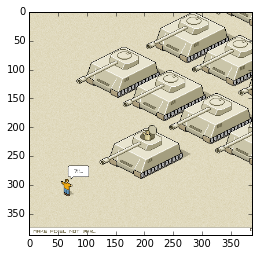

In [59]:
im = imread('tank-nasc1.png')

#Important: cut a square portion of the image
im = im[:,:387]
imshow(im)

## Fourier transform

In [66]:
image_data = to_bw(im) #convert to black and white
ft = fftshift(fftn(fftshift(image_data))) #calculate Fourier transform

## Draw and save

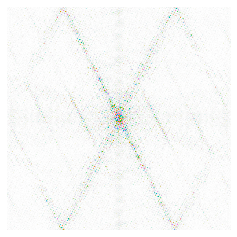

In [71]:
#draw fourier transform

cl=400
rainbow_draw(ft, 
             cl=cl, # cl gives saturation
             kind='light_husl') #There are four possible colormaps: light_husl, dark_husl, light_huslp, dark_huslp


#save the original image with its pixels, and not the representation
imsave('fft.png', rainbow_image(ft, cl=cl, kind='light_husl'))

## Check the result

The code below only works on mac, otherwise navigate to the working folder and find the fft.png file

In [72]:
!open fft.png